범주형 자료란? 관측 결과가 몇 개의 범주 또는 항목의 형태로 나타나는 자료를 말한다.

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
items = ['TV', '냉장고', '세탁기', '컴퓨터', '선풍기',  '선풍기', '믹서', '믹서']

In [3]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [4]:
print("인코딩 변환 결과 : ", labels)

인코딩 변환 결과 :  [0 1 4 5 3 3 2 2]


In [5]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '세탁기', '컴퓨터'], dtype='<U3')

In [6]:
encoder2 = LabelEncoder()
encoder2.fit(['남자', '여자'])
labels2 = encoder2.transform(['남자', '여자'])

In [7]:
labels2

array([0, 1])

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
import numpy as np

In [10]:
items_reshape = np.array(items).reshape(-1,1)
items_reshape

array([['TV'],
       ['냉장고'],
       ['세탁기'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U3')

In [11]:
one_encoder = OneHotEncoder()
one_encoder.fit(items_reshape)
oh_labels = one_encoder.transform(items_reshape)

In [12]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [13]:
oh_labels.toarray().shape

(8, 6)

In [14]:
items.__len__()

8

In [15]:
set(items).__len__() # 유니크한 값

6

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame({"itmes" : items})
df

,itmes
0,TV
1,냉장고
2,세탁기
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [18]:
pd.get_dummies(df) # 원핫인코더 처럼 됨.

,itmes_TV,itmes_냉장고,itmes_믹서,itmes_선풍기,itmes_세탁기,itmes_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [19]:
titanic_df = pd.read_csv("./data/titanic_train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
titanic_df["Age"].mean()

29.69911764705882

## 결측치 처리

In [52]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)

In [53]:
titanic_df["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [54]:
titanic_df["Cabin"].fillna("N", inplace=True)

In [263]:
titanic_df['Embarked'].fillna("N", inplace=True)

In [264]:
titanic_df.isnull().sum().sum()

0

## 데이터 탐색

In [57]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [58]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [40]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
titanic_df["Cabin"].apply(lambda x : x[:1]) # 나

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [161]:
titanic_df["Cabin"].str[0] # 강사님

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

### 성별에 따른 생존여부?

In [45]:
titanic_df[['Sex', 'Survived']].sort_values(by=['Sex'])

,Sex,Survived
383,female,1
218,female,1
609,female,1
216,female,1
215,female,1
...,...,...
371,male,0
372,male,0
373,male,0
360,male,0


### 내가한거

In [50]:
titanic_df[['Sex', 'Survived']].sort_values(by=['Sex']).groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


### 강사님이 하신거

In [48]:
titanic_df.groupby(['Sex', 'Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [87]:
233 / (233 + 81)

0.7420382165605095

In [89]:
109 / (468+109)

0.18890814558058924

In [88]:
titanic_df.groupby(['Sex', 'Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [60]:
import seaborn as sns

<AxesSubplot:>

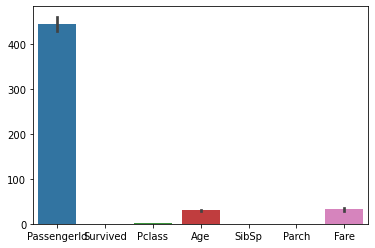

In [61]:
sns.barplot(data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

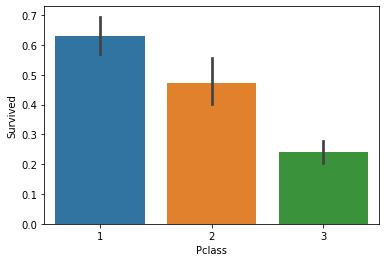

In [62]:
sns.barplot(x = 'Pclass', y='Survived', data = titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

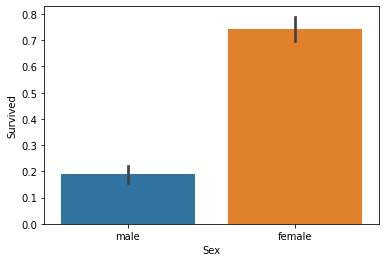

In [66]:
sns.barplot(data = titanic_df, x = 'Sex', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

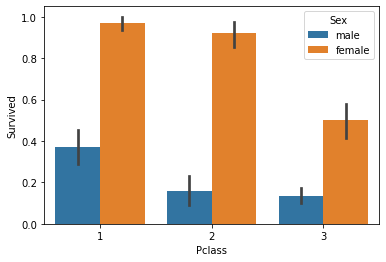

In [75]:
sns.barplot(data = titanic_df, x = 'Pclass', y='Survived', hue='Sex')

age <= 5 -> Baby
age <= 12 -> Child
18 -> Teenager
25 -> Student
35 -> Young Adult
60 -> Adult
나머지 -> Elderly

In [101]:
titanic_df[['Age']]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000



Age 가 5살 이하는 Baby <br/>
12살 이하는 Child <br/>
18살 이하는 Teenager <br/>
25살 이하는 Student <br/>
35살 이하는 Young Adult <br/>
60살 이하는 Adult <br/>
나머지는 Elderly <br/>


In [116]:
titanic_df['Age'].apply(lambda x : 'Baby' if x<=5 
                        'Child' else if 5<x<=12 
                        'Teenager' else if(5<x<=12)
                        'Student' else if(18<x<=25)
                        'Young Adult' else if(25<x<=35)
                        'Adult' else if(35<x<=60) 
                        else 'Elderly')
# 어케 해야되지?

SyntaxError: invalid syntax (Temp/ipykernel_17828/1672438003.py, line 1)

### 강사님 

In [146]:
titanic_df['Age_cate'] = titanic_df['Age'].apply(lambda x : 'Baby' if x<=5
                        else 'Child' if 5<x<=12 
                        else 'Teenager' if(5<x<=18)
                        else 'Student' if(18<x<=25)
                        else 'Young Adult' if(25<x<=35)
                        else 'Adult' if(35<x<=60) 
                        else 'Elderly')
# 이거였다...

### 다른사람 코드

In [129]:
ages = titanic_df['Age']
bins = [0, 5, 12, 18, 25, 35, 60, 100]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

cuts = pd.cut(ages, bins, right=True, labels=labels)
cuts.value_counts()


Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age, dtype: int64

In [150]:
titanic_df['Age_cut'] = cuts

### 강사님

In [139]:
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat
    
    
titanic_df['Age_ct2'] = titanic_df['Age'].apply(get_category)

In [140]:
titanic_df['Age_ct2'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age_ct2, dtype: int64

In [143]:
import matplotlib.pyplot as plt

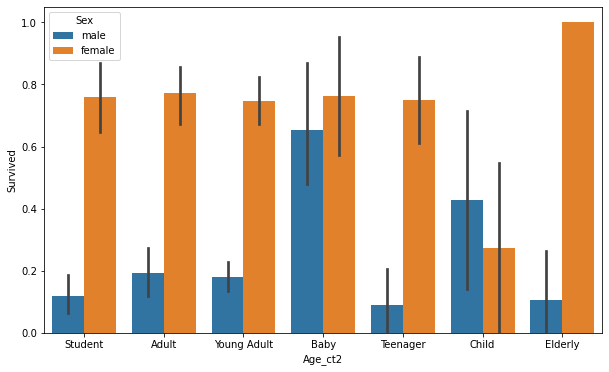

In [144]:
plt.figure(figsize=(10,6))

sns.barplot(x='Age_ct2', y = 'Survived', hue='Sex', data=titanic_df)
plt.show()

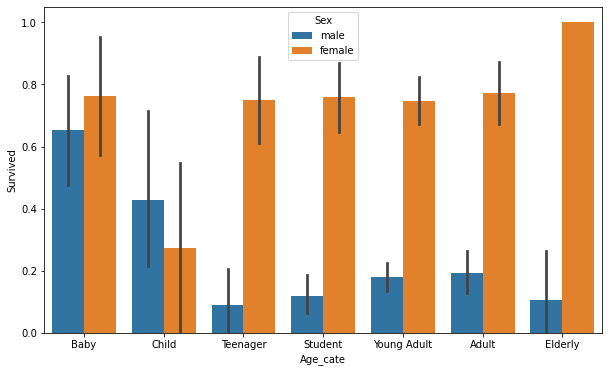

In [148]:
plt.figure(figsize=(10,6))

group_names = ['Baby', 'Child', 'Teenager', 'Student', "Young Adult", "Adult", "Elderly"]
sns.barplot(x='Age_cate', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
plt.show()

In [151]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_ct2', 'Age_cate',
       'Age_cut'],
      dtype='object')

In [155]:
titanic_df.drop(['Age_cate', 'Age_ct2', 'Age_cut'], axis=1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


In [163]:
titanic_df = titanic_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].copy()

# drop 할 컬럼이 더 많을때 하는 방법.

# 경고를 피하려고 copy 하는데 나는 왜 copy를 안해도 에러가 안나지?

titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


In [164]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[0]

In [166]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


### 범주형 데이터(Sex, Cabin, Embarked) -> LabelEncoding 변환

In [168]:
encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
titanic_df['Sex'] = encoder.transform(titanic_df['Sex'])

In [169]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,C


In [170]:
encoder = LabelEncoder()
encoder.fit(titanic_df['Cabin'])
titanic_df['Cabin'] = encoder.transform(titanic_df['Cabin'])

In [171]:
encoder = LabelEncoder()
encoder.fit(titanic_df['Embarked'])
titanic_df['Embarked'] = encoder.transform(titanic_df['Embarked'])

In [175]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,2


In [177]:
# 위에 여러번 반복하는 코드 줄이기
for label in ['Sex', 'Cabin', 'Embarked']:
    encoder = LabelEncoder()
    encoder.fit(titanic_df[label])
    titanic_df[label] = encoder.transform(titanic_df[label])

In [178]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,2


#### PassengerId, Name, Ticket 삭제

In [188]:
# titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# 한번 더 실행해서 에러떠서 주석

In [186]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,2


In [192]:
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

In [193]:
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,2
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,2
3,1,0,35.000000,1,0,53.1000,2,2
4,3,1,35.000000,0,0,8.0500,7,2
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,2
887,1,0,19.000000,0,0,30.0000,1,2
888,3,0,29.699118,1,2,23.4500,7,2
889,1,1,26.000000,0,0,30.0000,2,0


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [199]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.8491620111731844


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
y_test.value_counts()

0    118
1     61
Name: Survived, dtype: int64

In [ ]:
/[\w.%+-]+@[\w.-]+\.[a-zA-Z]{2,4}/

In [217]:
import requests

In [224]:
head = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}

In [225]:
r = requests.get("https://news.naver.com/main/list.naver?mode=LS2D&sid2=230&sid1=105&mid=shm&date=20220425&page=1", headers=head)

In [262]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(r.text, 'lxml')
bs.findAll("a")

[<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>,
 <a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>,
 <a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>,
 <a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>,
 <a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>,
 <a class="entertain nclicks(gnb.enter)" href="https://entertain.naver.com/home">TV연예</a>,
 <a class="sports nclicks(gnb.sports)" href="https://sports.news.naver.com">스포츠</a>,
 <a class="weather nclicks(gnb.weather)" href="https://weather.naver.com">날씨</a>,
 <a class="premium nclicks(gnb.premium)" href="https://contents.premium.naver.com">프리미엄</a>,
 <a class="nclicks(lnb.pcmedia)" href="/"><span class="tx">언론사별</span> </a>,
 <a class="nclicks(lnb.pol)" href="/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100"><span class="tx">정치</span> </a>,
 <a class="

In [246]:
import re

In [247]:
text = "https://n.news.naver.com/mnews/article/243/0000025733?sid=105"

In [258]:
p = "[0-9]+\?sid"

In [259]:
pattern = re.compile(p)

In [260]:
pattern.findall(text)

['0000025733?sid']

In [272]:
p = "([0-9]+)\?sid" # + 가 있어야 숫자 여러개 다 뽑음
pattern = re.compile(p)
pattern.findall(r.text)

['0006051094',
 '0006051094',
 '0004825635',
 '0004825635',
 '0001982483',
 '0001982483',
 '0001521400',
 '0001521400',
 '0002254896',
 '0002254896',
 '0002254895',
 '0002254895',
 '0000025733',
 '0000025733',
 '0002254894',
 '0002254894',
 '0006051055',
 '0006051055',
 '0004825617',
 '0004825617',
 '0003012666',
 '0000671455',
 '0000671455',
 '0011144359',
 '0011144359',
 '0004690079',
 '0004690079',
 '0011144358',
 '0011144358',
 '0011144357',
 '0011144357',
 '0002123392',
 '0002123392',
 '0004954589',
 '0004954589',
 '0000038857',
 '0000038857',
 '0002254891',
 '0002254891',
 '0003190063',
 '0004690050',
 '0004737353',
 '0013136326',
 '0005199448',
 '0004737350',
 '0000025728',
 '0005079430',
 '0004046289',
 '0003012656',
 '0005199607',
 '0005199600',
 '0013136018',
 '0000283463',
 '0000225920']